In [16]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df_profits = pd.read_csv('final_data.csv')
df_profits.drop(columns='Unnamed: 0', inplace=True)
df_profits.head()

,budget,genres,id,imdb_id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,gross_profit,ROI (%),qty_of_genres,weighted_budget,weighted_ROI,release_year
0,13200000,"['Comedy', 'Drama', 'Romance']",19404,tt0112870,17.437,1995-10-20,100000000,190.0,Dilwale Dulhania Le Jayenge,8.8,2214,86800000.0,657.58,3,4400000.00,219.19,1995
1,25000000,"['Drama', 'Crime']",278,tt0111161,35.028,1994-09-23,28341469,142.0,The Shawshank Redemption,8.7,15045,3341469.0,13.37,2,12500000.00,6.68,1994
2,6000000,"['Drama', 'Crime']",238,tt0068646,29.433,1972-03-14,245066411,175.0,The Godfather,8.7,11486,239066411.0,3984.44,2,3000000.00,1992.22,1972
3,11363000,"['Comedy', 'Thriller', 'Drama']",496243,tt6751668,176.819,2019-05-30,201055038,132.0,Parasite,8.6,4751,189692038.0,1669.38,3,3787666.67,556.46,2019
4,22000000,"['Drama', 'History', 'War']",424,tt0108052,19.641,1993-11-30,321365567,195.0,Schindler's List,8.6,9163,299365567.0,1360.75,3,7333333.33,453.58,1993


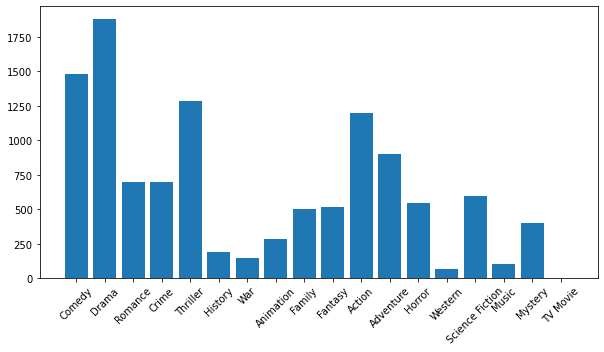

In [23]:
# Number of genres in total, many more comedy and drama movies
fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(rotation=45)
plt.bar(genre_and_count.keys(), genre_and_count.values());

In [17]:
#Preprocess rows in genres so that we can show each genre

import ast #one example
from tqdm import tqdm # progress bar

#Fix data type of Genre Column
df['genres'][0]
res = ast.literal_eval(df['genres'][0]) 

df_profits = df_profits.reset_index(drop=True)

res_list = [] #loop through
for i in df_profits['genres']:
    res = ast.literal_eval(i)
    res_list.append(res)

df_profits['genres'] = res_list

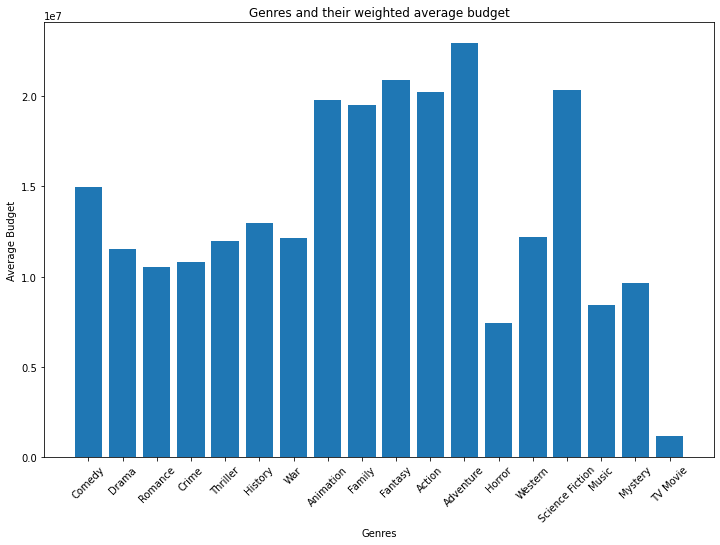

In [18]:
# count of all genres
genre_and_count ={}
for genres in df_profits.genres:
    for genre in genres:
        genre_and_count[genre] = genre_and_count.get(genre, 1) + 1 

#sum the weighted budget for each genre to average it by the number of individual genres in next cell
genre_wbudget ={} 
for index in df_profits.index:
    for genre in df_profits['genres'][index]:
        budget = df_profits['weighted_budget'][index] 
        genre_wbudget[genre] = genre_wbudget.get(genre,0) + budget
genre_wbudget

# get average of the weighted budget by genre count
genre_and_weight_budget = {}
for genre, budget in genre_wbudget.items():
    genre_and_weight_budget.update({genre:budget / genre_and_count[genre]})
genre_and_weight_budget 

plt.figure(figsize=(12,8));
plt.bar(genre_and_weight_budget.keys(),genre_and_weight_budget.values());
plt.title('Genres and their weighted average budget');
plt.xlabel('Genres');
plt.ylabel('Average Budget');
plt.xticks(rotation=45)
plt.show()

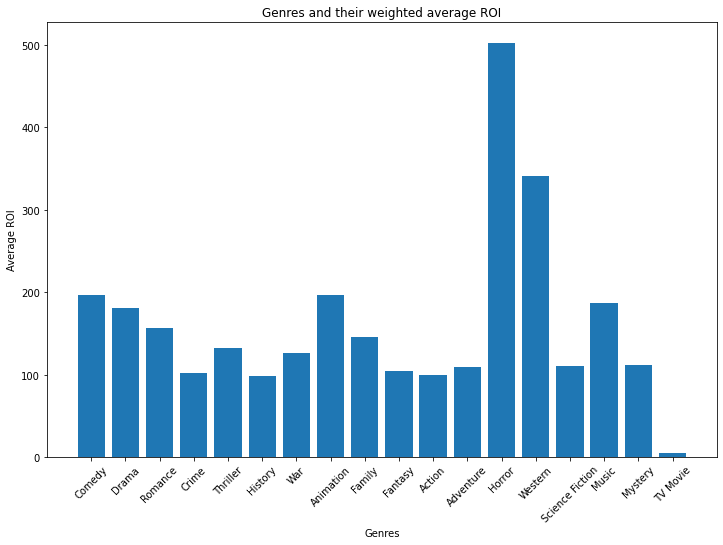

In [21]:
# trying to link genre to the ROI
genre_roi_sum = {}
for index in df_profits.index:
    for genre in df_profits['genres'][index]:
        roi = df_profits['weighted_ROI'][index] 
        genre_roi_sum[genre] = genre_roi_sum.get(genre,0) + roi    
genre_weighted_roi = {}
for genre, roi in genre_roi_sum.items():
    genre_weighted_roi.update({genre: roi / genre_and_count[genre]})
plt.figure(figsize=(12,8));
plt.bar(genre_weighted_roi.keys(),genre_weighted_roi.values());
plt.title('Genres and their weighted average ROI');
plt.xlabel('Genres');
plt.ylabel('Average ROI');
plt.xticks(rotation=45)
plt.show()

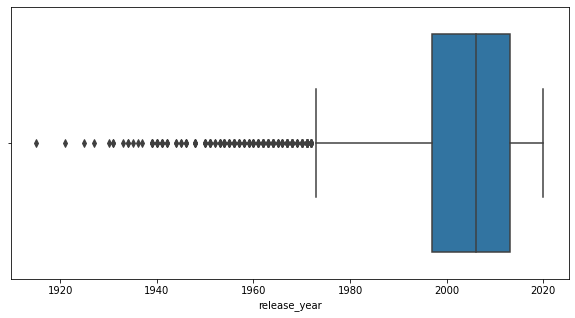

In [31]:
# most of our data is between 2000 and 2017
import datetime

plt.subplots(figsize=(10,5))

df_profits['release_date'] = pd.to_datetime(df_profits['release_date'])

df_profits['release_year'] = df_profits['release_date'].map(lambda x: x.year)

sns.boxplot(df_profits['release_year']);

In [26]:
# Creating pandas datetime from the release date string
df_profits['release_date'] = pd.to_datetime(df_profits['release_date'])

# Adding column for the month of year it was released
df_profits['release_month'] = pd.DatetimeIndex(df_profits['release_date']).month

# creating table for the plot
grouped_by_month = df_profits.groupby(['release_month']).mean().reset_index()
month_and_gp =grouped_by_month[['release_month','gross_profit']]
month_and_gp

,release_month,gross_profit
0,1,4.318331e+07
1,2,6.030782e+07
2,3,7.765422e+07
3,4,8.725812e+07
4,5,1.334785e+08
5,6,1.410546e+08
6,7,1.076186e+08
7,8,4.811661e+07
8,9,3.879670e+07
9,10,6.203410e+07


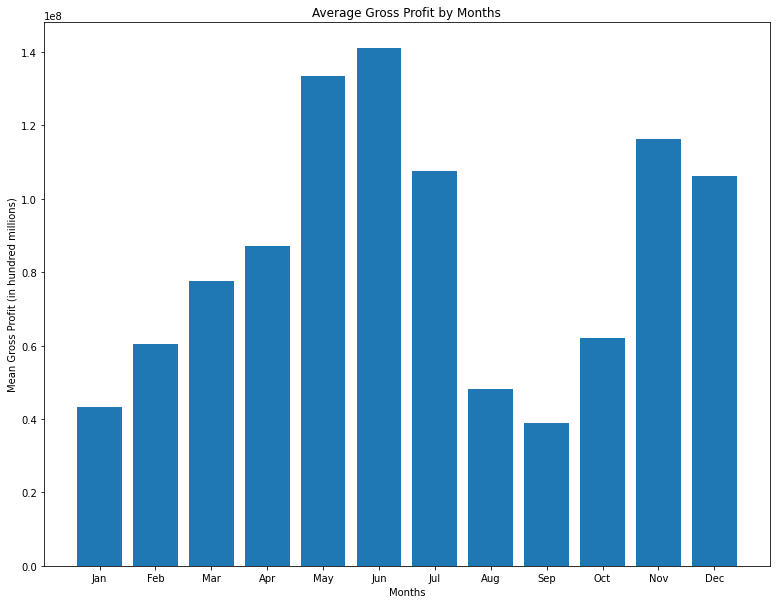

In [27]:
plt.figure(figsize=(13,10));
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.bar(x=months,height=month_and_gp['gross_profit']);
plt.xlabel('Months')
plt.ylabel('Mean Gross Profit (in hundred millions)')
plt.title('Average Gross Profit by Months')
plt.show()